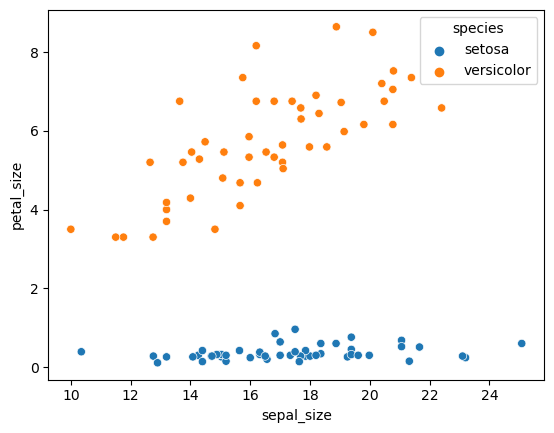

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = sns.load_dataset('iris')

iris = iris[iris['species'] != 'virginica']

iris['sepal_size'] = iris['sepal_length'] * iris['sepal_width']
iris['petal_size'] = iris['petal_length'] * iris['petal_width']

df = iris.drop(columns=['petal_length', 'sepal_length', 'petal_width', 'sepal_width'],axis = 1)

pontos_df = [(row['sepal_size'], row['petal_size']) for _, row in df.iterrows()]


sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')

plt.show()

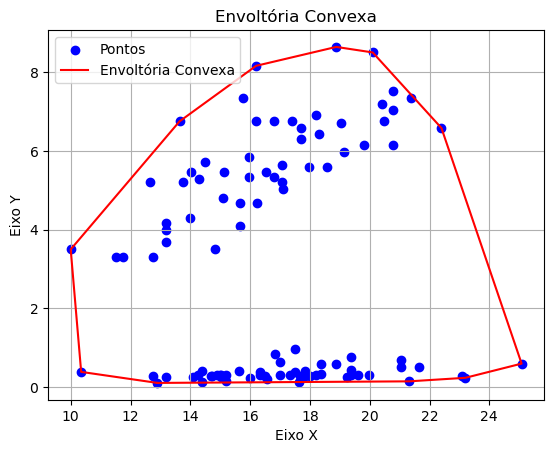

In [2]:
import matplotlib.pyplot as plt
import random
import math

# Função para calcular a orientação dos pontos
def orientacao(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else 2  # Horário ou anti-horário

# Função para encontrar o ponto mais baixo (e mais à esquerda)
def ponto_mais_baixo(pontos):
    o_ponto_mais_baixo = pontos[0]
    for ponto in pontos:
        if ponto[1] < o_ponto_mais_baixo[1] or (ponto[1] == o_ponto_mais_baixo[1] and ponto[0] < o_ponto_mais_baixo[0]):
            o_ponto_mais_baixo = ponto
    return o_ponto_mais_baixo

# Função para ordenar pontos angularmente a partir do ponto mais baixo
def ordenar_pontos_angularmente(pontos):
    o_ponto_mais_baixo = ponto_mais_baixo(pontos)
    return sorted(pontos, key=lambda ponto: (math.atan2(ponto[1] - o_ponto_mais_baixo[1], ponto[0] - o_ponto_mais_baixo[0]), ponto))

# Função para calcular a envoltória convexa
def envoltoria_convexa(pontos):
    n = len(pontos)
    if n < 3:
        return None  # Não é possível calcular a envoltória convexa com menos de 3 pontos

    pontos_ordenados = ordenar_pontos_angularmente(pontos)
    envoltoria = [pontos_ordenados[0], pontos_ordenados[1]]

    for i in range(2, n):
        while len(envoltoria) > 1 and orientacao(envoltoria[-2], envoltoria[-1], pontos_ordenados[i]) != 2:
            envoltoria.pop()
        envoltoria.append(pontos_ordenados[i])

    return envoltoria


# Calcular a envoltória convexa
envoltoria = envoltoria_convexa(pontos_df)

# Plotar os pontos e a envoltória convexa
x, y = zip(*pontos_df)
env_x, env_y = zip(*envoltoria)

plt.scatter(x, y, c='b', marker='o', label='Pontos')
plt.plot(env_x + (env_x[0],), env_y + (env_y[0],), linestyle='-', color='r', label='Envoltória Convexa')
plt.legend()
plt.title('Envoltória Convexa')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.show()


In [3]:
x, y = df.shape
tipo1 = []
tipo2 = []
for i in range (0,x):
    if df['species'][i] == "setosa":
        tipo1.append(((df["petal_size"][i]), df["sepal_size"][i]))
    else:
        tipo2.append((df["petal_size"][i], df["sepal_size"][i]))


<Axes: xlabel='sepal_size', ylabel='petal_size'>

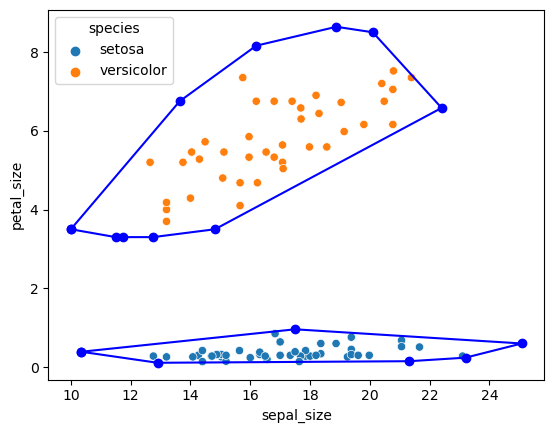

In [4]:
envoltoria11 = envoltoria_convexa(tipo1)
envoltoria22= envoltoria_convexa(tipo2)


y, x = zip(*envoltoria11)

# Criar um gráfico e plotar os pontos
plt.plot(x + (x[0],), y + (y[0],), linestyle='-', marker='o', color='b')

d, c = zip(*envoltoria22)

# Criar um gráfico e plotar os pontos
plt.plot(c + (c[0],), d + (d[0],), linestyle='-', marker='o', color='b')
sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')



In [5]:
# Função para verificar a orientação dos pontos (usada para determinar a direção da rotação)
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Os pontos são colineares
    return 1 if val > 0 else 2  # 1 para horário, 2 para anti-horário

# Função para verificar a interseção de segmentos
def do_intersect(p1, q1, p2, q2):
    # Encontre as orientações dos quatro pontos
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # Casos gerais
    if o1 != o2 and o3 != o4:
        return True

    # Casos especiais
    if o1 == 0 and on_segment(p1, p2, q1):
        return True
    if o2 == 0 and on_segment(p1, q2, q1):
        return True
    if o3 == 0 and on_segment(p2, p1, q2):
        return True
    if o4 == 0 and on_segment(p2, q1, q2):
        return True

    return False

# Função auxiliar para verificar se um ponto está em um segmento
def on_segment(p, q, r):
    if (
        min(p[0], r[0]) <= q[0] <= max(p[0], r[0])
        and min(p[1], r[1]) <= q[1] <= max(p[1], r[1])
    ):
        return True
    return False

# Função principal para verificar a sobreposição entre duas envoltórias convexas
def check_convex_hull_overlap(convex_hull1, convex_hull2):
    n1 = len(convex_hull1)
    n2 = len(convex_hull2)

    # Verifique se há interseção entre os segmentos de ambos os conjuntos de envoltória convexa
    for i in range(n1):
        for j in range(n2):
            if do_intersect(
                convex_hull1[i], convex_hull1[(i + 1) % n1],
                convex_hull2[j], convex_hull2[(j + 1) % n2]
            ):
                return True  # Há interseção

    return False  # Não há interseção

In [6]:


# Exemplo de uso:
# Suponha que convex_hull1 e convex_hull2 são listas de pontos que representam as envoltórias convexas das duas classes
# Por exemplo, convex_hull1 = [(x1, y1), (x2, y2), ...], convex_hull2 = [(x1, y1), (x2, y2), ...]

check_convex_hull_overlap(envoltoria11, envoltoria22)

False

In [7]:
def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def pontos_mais_proximos(conjunto1, conjunto2):
    min_dist = float('inf')
    pontos = None
    
    for p1 in conjunto1:
        for p2 in conjunto2:
            dist = distancia(p1, p2)
            if dist < min_dist:
                min_dist = dist
                pontos = (p1, p2)
                
    return pontos, min_dist

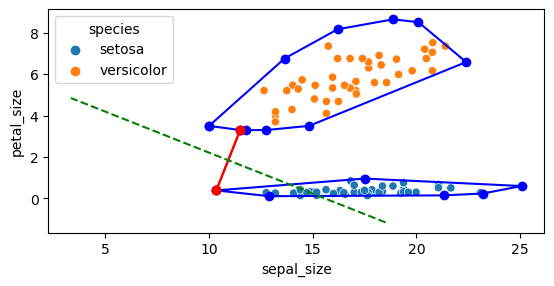

In [8]:
x, y = df.shape
tipo1 = []
tipo2 = []
for i in range (0,x):
    if df['species'][i] == "setosa":
        tipo1.append(((df["petal_size"][i]), df["sepal_size"][i]))
    else:
        tipo2.append((df["petal_size"][i], df["sepal_size"][i]))

envoltoria11 = envoltoria_convexa(tipo1)
envoltoria22= envoltoria_convexa(tipo2)

pontos, dist = pontos_mais_proximos(envoltoria11, envoltoria22)


y, x = zip(*envoltoria11)

plt.plot(x + (x[0],), y + (y[0],), linestyle='-', marker='o', color='b')

d, c = zip(*envoltoria22)

plt.plot(c + (c[0],), d + (d[0],), linestyle='-', marker='o', color='b')
sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='species')

p1, p2 = pontos
plt.plot(*zip(*((p[1], p[0]) for p in pontos)), linestyle='-', color='r', marker='o')

p1, p2 = pontos
plt.plot(*zip(*((p[1], p[0]) for p in pontos)), linestyle='-', color='r', marker='o')

######

# ponto medio
ponto_medio = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

if p2[1] - p1[1] != 0:  
    inclinacao = (p2[1] - p1[1]) / (p2[0] - p1[0])
    # Inclinação que gera a linha perpendicularr
    inclinacao_perpendicular = -1 / inclinacao

    delta = 3
    y_perpendicular = [ponto_medio[0] - delta, ponto_medio[0] + delta]
    x_perpendicular = [ponto_medio[1] - delta*inclinacao_perpendicular, ponto_medio[1] + delta*inclinacao_perpendicular]

    plt.plot(x_perpendicular, y_perpendicular, linestyle='--', color='g')

# deixando o gráfico proporcional
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [9]:
def criar_segmentos(pontos):
    if len(pontos) < 2:
        return []  
    
    segmentos = [(pontos[i], pontos[i + 1]) for i in range(len(pontos) - 1)]
    
    segmentos.append((pontos[-1], pontos[0]))
    
    return segmentos

def intersecta(p1, q1, p2, q2):
    o1 = orientacao(p1, q1, p2)
    o2 = orientacao(p1, q1, q2)
    o3 = orientacao(p2, q2, p1)
    o4 = orientacao(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True
    
    return False

Código para ver se existe intersecção em um conjunto de segmentos

To usando uma biblioteca pra árvore balanceada, se não pudermos vamo ter que codar ela

In [10]:
from sortedcontainers import SortedList


def varredura_linear(segmentos):
    eventos = SortedList()
    for seg in segmentos:
        segmento_ordenado = tuple(sorted(seg, key=lambda p: (p[0], p[1])))
        eventos.add((segmento_ordenado[0], 'inicio', segmento_ordenado))
        eventos.add((segmento_ordenado[1], 'fim', segmento_ordenado))

    eventos = SortedList(eventos, key=lambda x: (x[0][0], x[0][1], 0 if x[1] == 'inicio' else 1))

    ativos = SortedList(key=lambda seg: seg[0][1]) 

    for evento in eventos:
        ponto, tipo, segmento = evento
        
        if tipo == 'inicio':
            ativos.add(segmento)
            indice = ativos.index(segmento)

            if indice > 0 and intersecta(*ativos[indice-1], *segmento):
                return True
            if indice < len(ativos)-1 and intersecta(*ativos[indice+1], *segmento):
                return True
        else:
            indice = ativos.index(segmento)
            ativos.remove(segmento)

            if 0 < indice < len(ativos) and intersecta(*ativos[indice-1], *ativos[indice]):
                return True
            
    return False

segmentos = criar_segmentos(envoltoria11)

print(varredura_linear(segmentos))
print(segmentos)


True
[((0.39, 10.35), (0.96, 17.5)), ((0.96, 17.5), (0.6000000000000001, 25.080000000000002)), ((0.6000000000000001, 25.080000000000002), (0.24, 23.2)), ((0.24, 23.2), (0.15000000000000002, 21.32)), ((0.15000000000000002, 21.32), (0.11000000000000001, 12.899999999999999)), ((0.11000000000000001, 12.899999999999999), (0.39, 10.35))]
